In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
# Dataset 
dataset_path = r"D:\5th-Semester\Global_Superstore_tableau.xlsx"

# Load dataset
df = pd.read_excel(dataset_path, sheet_name="Sheet1")

# Fill missing numeric values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical target column (Category)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

# Features and target
X = df.drop(['Category', 'Order ID', 'Customer ID', 'Customer Name',
             'Product ID', 'Product Name'], axis=1, errors='ignore')
y = df['Category']

# One-hot encode categorical columns (except target)
X = pd.get_dummies(X, drop_first=True)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save artifacts
import joblib
joblib.dump(scaler, 'scaler.joblib')
joblib.dump((X_train, X_test, y_train, y_test), 'processed_data.joblib')

print("Data Preprocessing Completed!")


Data Preprocessing Completed!


In [3]:
import os
print(os.getcwd())   # Ye batayega tumhari current working directory
print(os.listdir())  # Ye folder ke andar sab file names list karega


C:\Users\HELLO LARKANA
['-1.14-windows.xml', '.anaconda', '.cache', '.conda', '.continuum', '.gologin', '.icesoft', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.openjfx', '.pdfbox.cache', '.streamlit', '.VirtualBox', '.vscode', '3D Objects', 'AI-lab 4.ipynb', 'AI-LAB-08.ipynb', 'AI-lab-10.ipynb', 'Ai-lab04.ipynb', 'AI-LAB09.ipynb', 'AI-MID LAB EXAM.ipynb', 'app.ipynb', 'AppData', 'Application Data', 'chat_log.txt', 'Cisco Packet Tracer 7.3.0', 'Contacts', 'Cookies', 'data', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'Final Lab Exam.ipynb', 'FYP.ipynb', 'IntelGraphicsProfiles', 'internship task 9.ipynb', 'Internship.ipynb', 'InternshipTask2.ipynb', 'Internshiptask3.ipynb', 'InternshipTask4.ipynb', 'InternshipTask5.ipynb', 'Internship_Task1.ipynb', 'Links', 'Local Settings', 'Machine Learning Model', 'models', 'Music', 'My Documents', 'my_ml_pipeline', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}

In [4]:
from sklearn.ensemble import RandomForestClassifier
import joblib

#Direct RandomForest Training
best_model = RandomForestClassifier(
    n_estimators=100,   # 100 trees
    max_depth=None,     # no depth limit
    random_state=42,
    n_jobs=-1           # use all CPU cores for speed
)

best_model.fit(X_train, y_train)

# Save trained model
joblib.dump(best_model, 'trained_model.joblib')

print("Model Training Completed")


Model Training Completed



 Classification Report:

                 precision    recall  f1-score   support

      Furniture       1.00      1.00      1.00      1960
Office Supplies       0.95      1.00      0.97      6235
     Technology       1.00      0.84      0.91      2063

       accuracy                           0.97     10258
      macro avg       0.98      0.95      0.96     10258
   weighted avg       0.97      0.97      0.97     10258



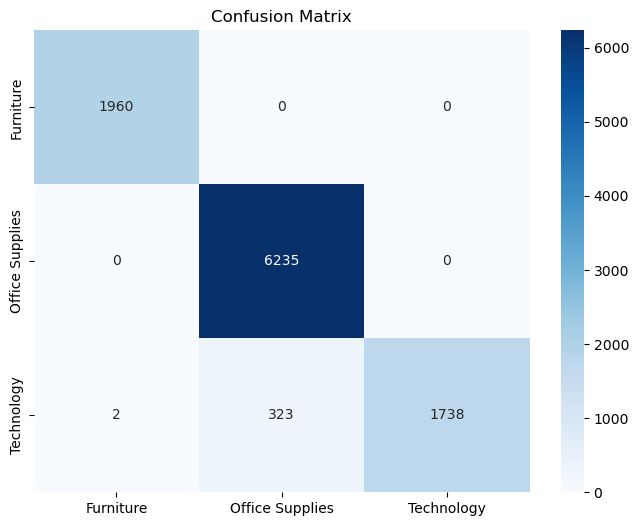

Evaluation Completed!


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = best_model.predict(X_test)

# Classification Report
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.show()

print("Evaluation Completed!")


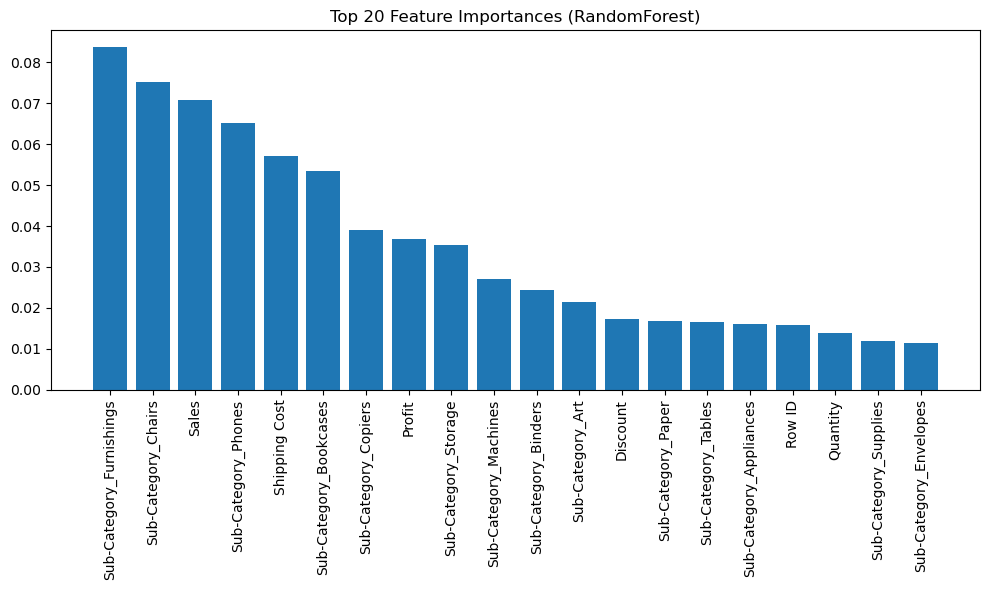

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Feature importance from trained RandomForest
importances = best_model.feature_importances_
feature_names = X.columns

# Top 20 most important features only (fast visualization)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances (RandomForest)")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()
